<a href="https://colab.research.google.com/github/ParishaKB/SM/blob/master/MLforImages/cap_nocap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Q1)**
## Import libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [ ]:
from PIL import Image
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

xcap = pd.DataFrame()
ycap = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/SM2_M2_J008/cap"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (100,100), interpolation=cv2.INTER_LINEAR)
      #if i <5:
        #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
        #plt.show()
      filename1d = rav_resized.reshape(-1)
      xcap["Imgcap"+ str(i)] = filename1d
      ycap["Imgcap"+ str(i)] = (0,1)
      i = i+1
      
   
ycap = ycap.T
xcap = xcap.T
print(xcap.head())
print(xcap.shape)
print(ycap.shape)

         0     1     2     3     4     5     ...  9994  9995  9996  9997  9998  9999
Imgcap0   144   150   152   152   148   159  ...    41    80   107    48    77    55
Imgcap1   139   143   149   149   150   152  ...    92    84    81    55    67    57
Imgcap2   173   172   172   173   171   169  ...    73    82    88    90    84    85
Imgcap3   177   178   176   176   175   176  ...    62    65    65    63    81    79
Imgcap4   172   174   174   176   175   175  ...    86    89    91    87    79    81

[5 rows x 10000 columns]
(20, 10000)
(20, 2)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

xnocap = pd.DataFrame()
ynocap = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/SM2_M2_J008/nocap"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (100,100), interpolation=cv2.INTER_LINEAR)
      #if i <5:
        #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
        #plt.show()
      filename1d = rav_resized.reshape(-1)
      xnocap["Imgnocap"+ str(i)] = filename1d
      ynocap["Imgnocap"+ str(i)] = (1,0)
      i = i+1
      
   
ynocap = ynocap.T
xnocap = xnocap.T
print(xnocap.head())
print(xnocap.shape)
print(ynocap.shape)

           0     1     2     3     4     ...  9995  9996  9997  9998  9999
Imgnocap0   169   168   170   173   172  ...    92    86    89    82    68
Imgnocap1   156   160   160   159   163  ...    94    29    39   188    47
Imgnocap2   171   171   170   172   172  ...    96    92    86    85    68
Imgnocap3   167   171   173   173   173  ...    73    83    77    64    82
Imgnocap4   169   168   171   171   174  ...    99    82    79    71    73

[5 rows x 10000 columns]
(20, 10000)
(20, 2)


In [ ]:
frames = [xcap,xnocap]
x= pd.concat(frames)
print(x.head())
print(x.tail())
print(x.shape)

         0     1     2     3     4     5     ...  9994  9995  9996  9997  9998  9999
Imgcap0   144   150   152   152   148   159  ...    41    80   107    48    77    55
Imgcap1   139   143   149   149   150   152  ...    92    84    81    55    67    57
Imgcap2   173   172   172   173   171   169  ...    73    82    88    90    84    85
Imgcap3   177   178   176   176   175   176  ...    62    65    65    63    81    79
Imgcap4   172   174   174   176   175   175  ...    86    89    91    87    79    81

[5 rows x 10000 columns]
            0     1     2     3     4     ...  9995  9996  9997  9998  9999
Imgnocap15   166   169   169   171   171  ...    93    80    72    65    63
Imgnocap16   169   171   172   174   173  ...    84    85    70    68    84
Imgnocap17   152   158   166   165   167  ...    53    84    90    90    71
Imgnocap18   169   170   170   172   172  ...   100   119   111   107   119
Imgnocap19   167   170   169   170   168  ...    94    95    89    68    79

[5 rows

In [ ]:
frames = [ycap,ynocap]
y= pd.concat(frames)
y = y.drop([0], axis=1)
print(y.head())
print(y.tail())
print(y.shape)

         1
Imgcap0  1
Imgcap1  1
Imgcap2  1
Imgcap3  1
Imgcap4  1
            1
Imgnocap15  0
Imgnocap16  0
Imgnocap17  0
Imgnocap18  0
Imgnocap19  0
(40, 1)


# Original Images

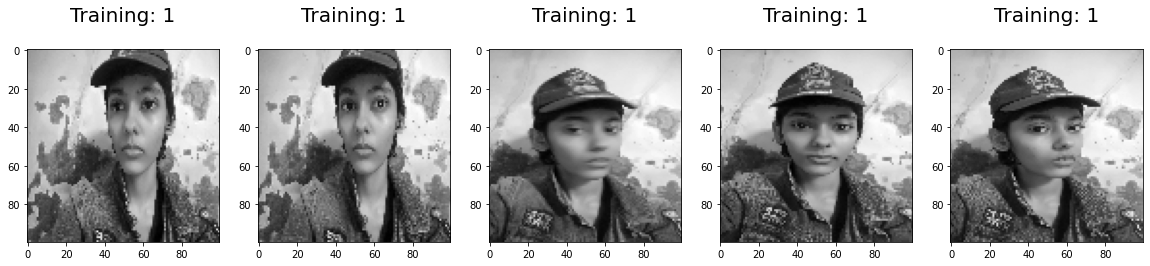

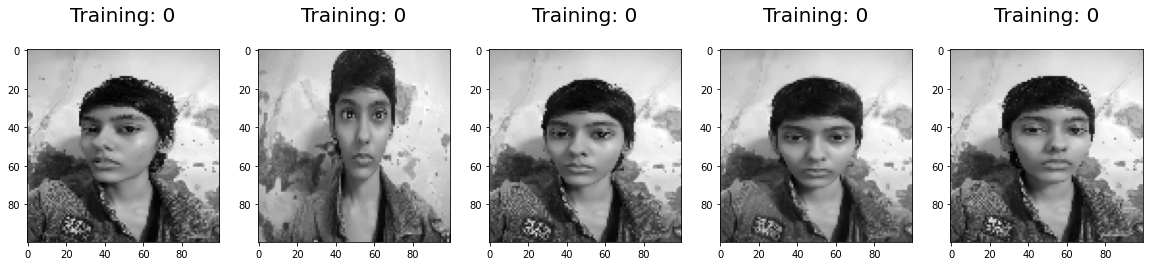

In [ ]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow((np.array(x.iloc[i,:])).reshape(100,100), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % y.iloc[i], fontsize = 20)
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow((np.array(x.iloc[i+20,:])).reshape(100,100), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % y.iloc[i+20], fontsize = 20)

Scaling 

In [ ]:
x = x/255.

Split to train and test

#PCA with all components

Mean Image

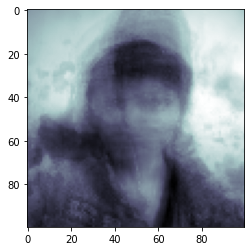

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit(x)
plt.imshow(pca1.mean_.reshape(100,100),cmap=plt.cm.bone)

Graph to check number of components

(40, 10000)


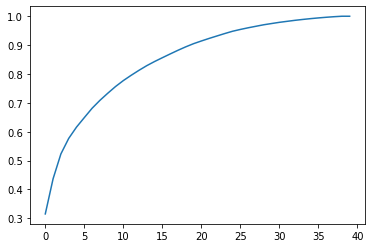

In [ ]:
print(pca1.components_.shape)
eigen_values = pca1.explained_variance_
#print(eigen_values)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

Eigen Face 1 for pca with all components 

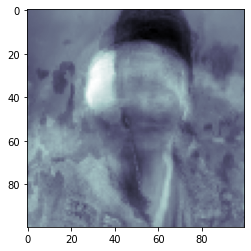

In [ ]:
plt.imshow(pca1.components_[0].reshape(100,100),cmap=plt.cm.bone)

#PCA with 30 components

Mean image for 30 components pca

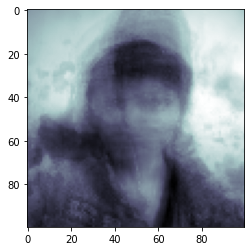

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(30)
pca1.fit(x)
plt.imshow(pca1.mean_.reshape(100,100),cmap=plt.cm.bone)

Graph to check number of components

(30, 10000)


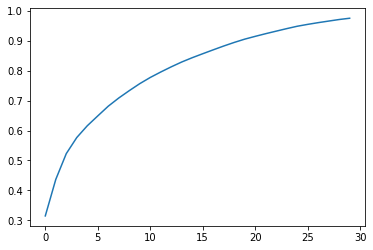

In [ ]:
print(pca1.components_.shape)
eigen_values = pca1.explained_variance_
#print(eigen_values)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

##**PCA with 20 components**

# Average Image 20 pca

(20, 10000)


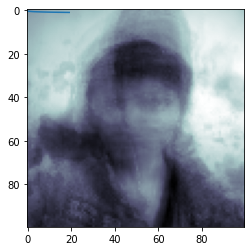

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(20)
pca1.fit(x)
plt.imshow(pca1.mean_.reshape(100,100),cmap=plt.cm.bone)
print(pca1.components_.shape)
eigen_values = pca1.explained_variance_
#print(eigen_values)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

# Eigen Face 1 with pca (20)

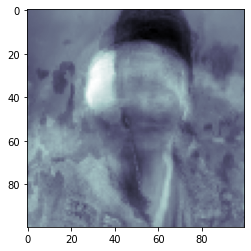

In [ ]:
plt.imshow(pca1.components_[0].reshape(100,100),cmap=plt.cm.bone)

# Multiple Eigen Faces for PCA (20)

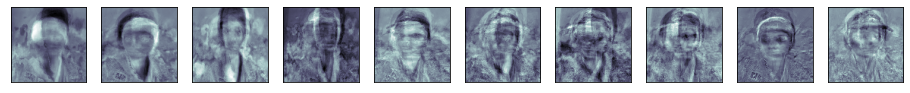

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(100,100),cmap=plt.cm.bone)
#eigen face

# Omega / Projected

In [ ]:
projected = pca1.fit_transform(x) 
print(projected.shape)

(40, 20)


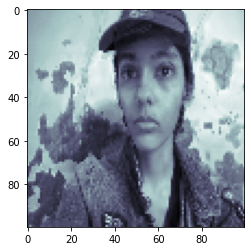

In [ ]:
#projected face
inv_proj = pca1.inverse_transform(projected)
plt.imshow(inv_proj[0].reshape(100,100),cmap=plt.cm.bone)

# Eigen Space 

In [ ]:
projected = pd.DataFrame(projected)
projected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,15.170084,-1.445134,-4.334580,-4.709402,-0.387238,-1.538917,-1.082327,-1.409690,1.786910,1.308586,0.581087,-3.435640,-3.288282,2.833295,1.521936,0.713408,-1.708026,-0.236134,-2.502096,-0.001913
1,15.020533,-0.861650,-4.147103,-5.062660,0.161441,-1.363258,-1.232527,-1.996830,1.741386,0.869769,0.556493,-3.086840,-2.857091,2.399704,1.491567,0.356379,-1.770687,-0.206838,-2.576395,-0.469324
2,-8.408088,8.909771,-2.473725,-2.128343,-3.393445,1.576920,1.469475,-1.908512,-1.992352,2.163694,-4.185323,-2.321825,0.483116,-1.453032,-0.720630,1.660091,0.320675,-1.188039,-0.067473,0.336805
3,-4.944888,2.473043,-0.570289,-3.586644,4.201914,4.777073,3.609055,-1.228758,0.207791,4.176880,4.320992,-0.794075,2.775135,-1.374338,2.976438,0.320967,-0.107516,-3.923020,1.685833,-1.570682
4,-8.385401,9.916939,-3.219591,-2.066535,-3.488186,0.434490,0.561384,-1.260216,-1.913072,3.321494,-5.603734,-2.570524,1.004137,-1.910317,-1.195236,2.231861,-0.211633,-2.534315,-0.359684,-0.187258


## Q2)

In [ ]:
nutrient = pd.read_csv("/content/gdrive/My Drive/SM2_M2_J008/nutrient.csv")

In [ ]:
nutrient.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
nutrient.shape

(8618, 42)

In [ ]:
data = nutrient.drop(['ID','FoodGroup','ShortDescrip','Descrip'], axis=1)
data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
data.shape

(8618, 38)

In [ ]:
#scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))

In [ ]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,-0.137643,0.376135,-0.253584,-0.697012,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918,0.757113,-0.546128,-0.244334,-0.137643,0.376135,-0.253584,-0.697012,-0.451809,-0.395218,-0.245398,-0.311347,-0.548385,-0.649918,-0.410557,-0.559918
1,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,-0.137643,0.376135,-0.253584,-0.697012,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830,0.757113,-0.546128,-0.253595,-0.137643,0.376135,-0.253584,-0.697012,-0.451809,-0.395218,-0.245398,-0.282379,-0.548385,-0.654842,-0.410557,-0.571830
2,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,-0.137643,0.500849,-0.269666,-0.705080,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742,0.957289,-0.550307,-0.281380,-0.137643,0.500849,-0.269666,-0.705080,-0.516275,-0.402935,-0.344726,-0.309541,-0.584057,-0.753325,-0.445904,-0.583742
3,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,-0.137643,-0.161694,-0.076688,-0.495535,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414,0.133490,-0.205541,-0.001218,-0.137643,-0.161694,-0.076688,-0.495535,0.321775,-0.348916,2.257682,-0.239089,-0.173821,1.137542,0.066632,0.205414
4,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,-0.137643,-0.159096,-0.162456,-0.681291,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546,0.254109,-0.416579,0.008044,-0.137643,-0.159096,-0.162456,-0.681291,0.252864,-0.377855,2.982780,-0.267895,-0.155984,1.452687,0.066632,0.187546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.463820,0.661242,0.910973,-0.801069,-0.482325,-0.469058,-0.060269,0.304294,2.494770,-0.137643,0.391724,-0.189258,-0.023077,-0.105030,-0.366279,-0.036808,-0.130522,-0.226446,0.486125,-0.079028,0.482632,2.148587,-0.259146,-0.060269,0.304294,2.494770,-0.137643,0.391725,-0.189258,-0.023077,-0.105030,-0.366279,-0.036808,-0.130522,0.486125,0.482632,2.148587,-0.259146
8614,-0.681540,0.854607,-0.618138,-0.602446,-0.482325,-0.469058,-0.118012,-0.318374,0.214113,-0.137643,-0.226649,-0.162456,-0.483124,-0.474039,-0.381713,-0.314928,-0.251675,-0.369636,0.075888,-0.074484,1.329583,0.321132,-0.125138,-0.118012,-0.318374,0.214113,-0.137643,-0.226649,-0.162456,-0.483124,-0.474039,-0.381713,-0.314928,-0.251620,0.075888,1.329583,0.321132,-0.125138
8615,0.251279,-1.092316,-0.671083,1.884207,4.899510,-0.469058,-0.120578,-0.552396,-0.283695,-0.137643,-0.226649,-0.269666,-0.685015,-0.394013,-0.154063,-0.300029,-0.275182,0.157724,-0.405694,-0.079028,-0.728704,-0.421161,-0.530139,-0.120578,-0.552396,-0.283695,-0.137643,-0.226649,-0.269666,-0.685015,-0.394013,-0.154063,-0.300029,-0.275218,-0.405694,-0.728704,-0.421161,-0.530139
8616,-0.805522,0.433753,-0.582841,-0.727641,-0.482325,-0.469058,-0.082083,-0.280763,-0.167926,-0.137643,1.072455,-0.237503,-0.416102,-0.260636,-0.385572,-0.314928,0.411953,0.140262,3.875036,-0.079028,0.571267,0.522612,-0.288925,-0.082083,-0.280763,-0.167926,-0.137643,1.072455,-0.237503,-0.416102,-0.260636,-0.385572,-0.314928,0.411953,3.875036,0.571267,0.522612,-0.288925


In [ ]:
data_scaled.shape

(8618, 38)

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca1.components_.shape)

(38, 38)


In [ ]:
pca1.components_

array([[ 9.32603577e-02,  1.10905574e-01,  1.31415519e-02, ...,
         1.47767840e-01,  7.55590579e-02,  1.87761240e-01],
       [-1.07176557e-01,  1.21812755e-01, -1.77740413e-02, ...,
         1.31365585e-03,  1.34056084e-01,  4.81675175e-02],
       [ 1.45459771e-01,  1.49082212e-01,  1.36412739e-01, ...,
         3.64687653e-01,  1.20334794e-01,  3.42069343e-02],
       ...,
       [-1.22171297e-12, -1.46760748e-12, -9.43496211e-13, ...,
        -9.64642055e-04, -8.73084202e-04, -7.15587515e-04],
       [ 1.41992939e-16, -9.29854863e-17, -8.48669778e-17, ...,
        -1.18420381e-09,  2.68269989e-09,  4.08455042e-10],
       [ 0.00000000e+00, -2.01939236e-16,  5.74986507e-17, ...,
        -6.59209206e-10,  3.41889439e-09,  9.46488929e-10]])

In [ ]:
eigen_values = pca1.explained_variance_
print(pca1.explained_variance_)

[9.86980856e+00 4.11519543e+00 3.42762176e+00 2.93274920e+00
 2.38162190e+00 2.09360800e+00 1.74277399e+00 1.62792580e+00
 1.32638997e+00 1.32186408e+00 1.03528569e+00 9.06185578e-01
 8.76004397e-01 7.84327498e-01 6.51888047e-01 5.71629856e-01
 5.24670700e-01 4.36514871e-01 4.18353902e-01 3.78842414e-01
 3.20043529e-01 2.57308569e-01 3.79616252e-03 4.11867777e-10
 2.09824229e-18 1.21529272e-18 4.48021762e-19 4.34577640e-19
 4.09789756e-19 3.27890898e-19 3.09905786e-19 1.77124693e-19
 1.22013555e-19 4.55361530e-20 3.67348514e-20 8.36802012e-21
 1.94647653e-30 5.25759358e-32]


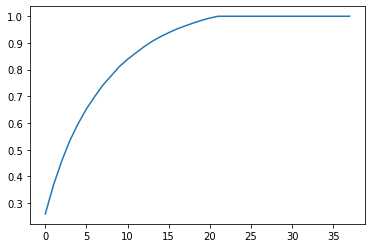

In [ ]:
import numpy as np
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

In [ ]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.25970167, 0.36798372, 0.45817382, 0.53534248, 0.59800947,
       0.65309802, 0.69895517, 0.74179035, 0.7766913 , 0.81147316,
       0.83871436, 0.86255858, 0.88560866, 0.90624646, 0.92339942,
       0.93844056, 0.95224608, 0.96373198, 0.97474002, 0.9847084 ,
       0.99312962, 0.99990011, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

## 14 variables capture the 90.62464 % of variability out of 38 variables